In [1]:
%pip install --upgrade pip
%pip install matplotlib
%pip install osmnx
%pip install networkx
%pip install csv
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


Note: you may need to restart the kernel to use updated packages.


In [2]:

import networkx as nx
import osmnx as ox
import matplotlib
import csv
import random
from dijkstra_algorithm import dijkstra_algorithm
from dijkstra_algorithm import make_route
from dijkstra_algorithm import dijkstra_algorithm_driver
from deliveries import delivery
from other_funcs import *
from minheap import MinHeap
from maxheap import MaxHeap
from driver import driver
import heapq

ox.__version__
random.seed(None)

28523


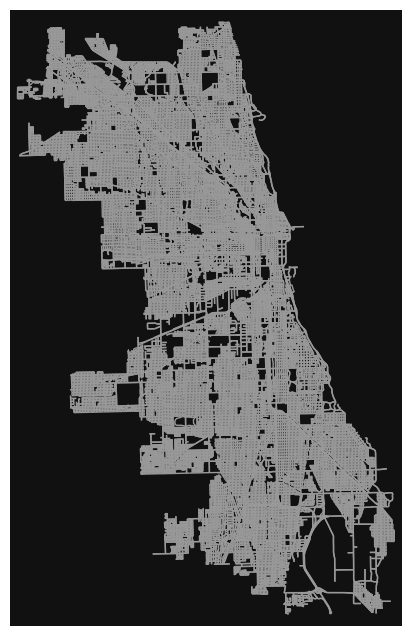

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Chicago, Illinois, USA", network_type="drive")
Gc = ox.utils_graph.get_largest_component(G, strongly=True)
print(len(Gc)) #9503
fig, ax = ox.plot_graph(Gc, node_size=0)

Need to make a list of all restaurants using what is below this markdown

In [4]:
file = open('Food_Inspections_20240223.csv')
type(file)

csvreader = csv.reader(file)
header = []
header = next(csvreader)
header

food_inspections = []
filled_locations = []

rows = []
for row in csvreader:
    rows.append(row)

need to filter out all the ones that don't have lat and long in the description of them

So now we have the list of nodes of all the restaurants we need to take these nodes and we need to make a delivery class to store the restaurant, the 
driver, and the drop off point and store the time of the delivery.

finds a number of random restaurants then the corresponding nodes

In [5]:
items = random_restaurant_locations(rows,5)
list_nodes = find_node(items,Gc)

print(list_nodes)

[310336195, 5578166418, 269446276, 261285319, 306082703]


This makes a list of deliveries that store the nodes associated with a restaurant

Now I need to make random nodes for the dropoff locations and the driver's initial locations

get all the nodes from the graph and set it to N_L = Node List

In [29]:
N_L = list(Gc.nodes)[None:None:None]
print(N_L)

[702090, 25779161, 25779173, 25779174, 25779189, 25779203, 25779221, 26098008, 26098016, 26098027, 26098045, 26098097, 26098113, 26098166, 26099529, 26099532, 26099533, 26099536, 26099537, 26099542, 26099544, 26218622, 26218631, 26220949, 26220951, 26220970, 26698357, 26699785, 26699799, 26699807, 26703423, 26703426, 26703434, 26703435, 26703510, 26703625, 26703636, 26703638, 26703640, 26703646, 26703648, 26703650, 26703891, 26703916, 26704134, 26704140, 26704147, 26704159, 26704163, 26704168, 26704169, 26704178, 26704186, 26704188, 26704211, 26704212, 26704221, 26704226, 26704233, 26704235, 26704238, 26791860, 26792807, 26792815, 26792817, 26792886, 26792889, 26792901, 26792906, 26793983, 26794001, 26794425, 26794449, 26794464, 26794474, 26794487, 26794507, 26794523, 26794540, 26794541, 26794543, 26794544, 26794545, 26794546, 26794549, 26794550, 26794555, 26794556, 26794558, 26794571, 26794572, 26794577, 26794582, 26794583, 26794584, 26794585, 26794589, 26794590, 26794592, 26794593, 2

Gets a list of drop off locations

get the drop off points put into a delivery class with 

then we can find the shortest path using the original location to destination using the graph G 

Gets the locations for drivers they can be set to a different number from the amount of orders we are not implementing them into the deliveries list because they are not always going to have an order to fulfill compared to there is always going to be a node for the dropoff location and restaurant node for the order

example of get_driver_points getting a list of nodes to use for drivers

In [30]:
# find the shortest path between nodes, minimizing travel time, then plot it
#route = ox.shortest_path(G, orig, dest, weight="travel_time")
#fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [31]:
Gc = ox.speed.add_edge_speeds(Gc)
Gc = ox.speed.add_edge_travel_times(Gc)

Need to implement a dijkstras algorithm here that will replace shortest path function that is built in 

Im going to use the shortest path built in function for now until I implement my own dikstras function - 
it would probably be better to implement the route into the delivery object

In [32]:
orders = 10
items = random_restaurant_locations(rows,orders)
list_nodes = find_node(items,Gc)

list_of_deliveries = []
for i in list_nodes:
    d = delivery(i,N_L)
    list_of_deliveries.append(d)


#gets random points for drivers the number of drivers can be higher or lower than the number of orders
drivers = []

num_of_drivers = 20
for i in range(num_of_drivers):
    single = driver(N_L)
    drivers.append(single)

Need to get every route for a driver to a restaurant then compare to find the lowest timed one. do this for all orders then pick the ones with the lowest times if 

In [33]:
find_routes_for_res_to_dropoff(Gc,list_of_deliveries)

now we can graph the full routes of all 

Now we can get the travel_time for a single edge

In [34]:
restaurant_set = set()
for i in list_of_deliveries:
    restaurant_set.add(i.restaurant_loc)

In [35]:
find_shortest_driver_dikstra(Gc,list_of_deliveries,drivers,restaurant_set)

need a connection between the shortest route for the restaurant

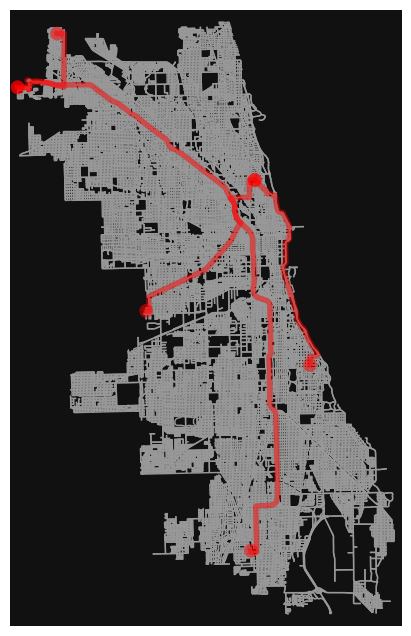

In [36]:
routes = []
routes = graph_full_routes(list_of_deliveries)
fig, ax = ox.plot_graph_routes(Gc, routes, node_size=0)